In [29]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [30]:
!unzip "/content/drive/MyDrive/Training.zip"  

Archive:  /content/drive/MyDrive/Training.zip
replace Training/Closed_eyes/s0002_00001_0_0_0_0_0_01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Training/Closed_eyes/s0002_00002_0_0_0_0_0_01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Training/Closed_eyes/s0002_00003_0_0_0_0_0_01.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [51]:
img_array=cv2.imread("/content/Training/Closed_eyes/s0002_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

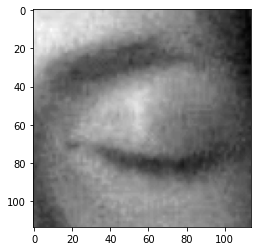

In [52]:
plt.imshow(img_array,cmap="gray")


In [53]:
img_array.shape

(114, 114)

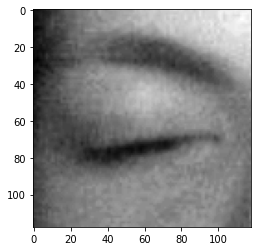

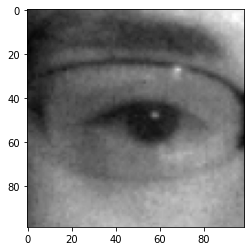

In [54]:
Data="Training/"
Classes=["Closed_eyes","Open_eyes"]
for category in Classes:
    path=os.path.join(Data,category)
    for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            plt.imshow(img_array,cmap="gray")
            plt.show()
            break
    

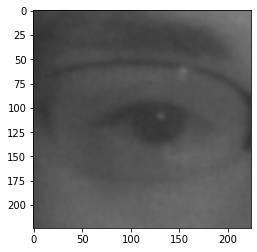

In [55]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")

In [64]:
training_data=[]
def create_trainingdata():
    for category in Classes:
        path=os.path.join(Data,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
          try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
          except Exception as e:
                pass

In [65]:
create_trainingdata()

In [66]:
print(len(training_data))


2013


In [67]:
import random
random.shuffle(training_data)
#training_data

In [68]:
X=[]
Y=[]
for features,labels in training_data:
    X.append(features)
    Y.append(labels)
X=np.array(X).reshape(-1,img_size,img_size,3)
X.shape

(671, 224, 224, 3)

In [69]:
X=X/255.0
X

array([[[[0.36862745, 0.36862745, 0.36862745],
         [0.36862745, 0.36862745, 0.36862745],
         [0.36470588, 0.35686275, 0.35294118],
         ...,
         [0.21176471, 0.20784314, 0.20784314],
         [0.20392157, 0.20392157, 0.2       ],
         [0.2       , 0.19607843, 0.19607843]],

        [[0.37254902, 0.37254902, 0.36862745],
         [0.36862745, 0.36470588, 0.36078431],
         [0.36078431, 0.35686275, 0.35686275],
         ...,
         [0.20392157, 0.20392157, 0.2       ],
         [0.2       , 0.2       , 0.2       ],
         [0.19607843, 0.19607843, 0.19607843]],

        [[0.36470588, 0.36470588, 0.36078431],
         [0.36078431, 0.35686275, 0.35686275],
         [0.35686275, 0.35686275, 0.35686275],
         ...,
         [0.20392157, 0.2       , 0.2       ],
         [0.2       , 0.2       , 0.2       ],
         [0.2       , 0.19607843, 0.19607843]],

        ...,

        [[0.28627451, 0.28627451, 0.29411765],
         [0.29803922, 0.30196078, 0.30588235]

In [70]:
Y=np.array(Y)
Y

array([0, 1, 1, ..., 0, 1, 0])

In [71]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
model=tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [73]:
base_input=model.layers[0].input
base_output=model.layers[-4].output

In [74]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [75]:
new_model=keras.Model(inputs=base_input,outputs=final_output)
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [76]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
new_model.fit(X,Y,epochs=45,validation_split=0.2)

Epoch 1/45
17/17 [==============================] - 5s 224ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.5069 - val_accuracy: 0.5037
Epoch 2/45
17/17 [==============================] - 3s 198ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 2.5456 - val_accuracy: 0.5259
Epoch 3/45
17/17 [==============================] - 3s 197ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.5009 - val_accuracy: 0.5407
Epoch 4/45
17/17 [==============================] - 4s 208ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 2.3989 - val_accuracy: 0.5407
Epoch 5/45
17/17 [==============================] - 3s 201ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 2.3468 - val_accuracy: 0.5259
Epoch 6/45
17/17 [==============================] - 3s 199ms/step - loss: 2.9370e-04 - accuracy: 1.0000 - val_loss: 2.3872 - val_accuracy: 0.5111
Epoch 7/45
17/17 [==============================] - 3s 198ms/step - loss: 7.6389e-04 - accuracy: 1.0000 - val_loss: 2.4091 - val_accuracy: 0.511

In [49]:
new_model.save('my_model1.h5')

In [50]:
new_model=tf.keras.models.load_model('my_model1.h5')